# car seat 매출 예측

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사로 가정한다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있는 상황이다.
    * 이를 해결하고자 예측 모델링을 해보고자 한다.

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|
| Income| 

* 데이터
    * data : 학습과 검증용
    * test : **팀과제용** 
        * feature만 있습니다.
        * 운영에서 발생된 데이터로 간주하고, 예측한 후에 Kaggle에 업로드합니다.

* 주의사항
    * data 에 대해 수행한 전처리 코드를 **순서에 맞춰** test에도 적용해야 함.

## 0.환경준비

### 0.1 Import

In [4]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 0.2 Data Loading

In [5]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


* 아래 데이터는 **팀 과제** 데이터

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_test_x.csv'

test = pd.read_csv(path)
test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,131.0,111.0,13,33,80,Bad,68,18,Yes,Yes
1,123.0,57.0,0,66,105,Medium,39,11,Yes,No
2,136.0,60.0,7,303,147,Medium,41,10,Yes,Yes
3,143.0,77.0,25,448,156,Medium,43,17,Yes,Yes
4,111.0,75.0,1,377,108,Good,25,12,Yes,No


## 1.데이터 탐색

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        300 non-null    float64
 1   CompPrice    287 non-null    float64
 2   Income       288 non-null    float64
 3   Advertising  300 non-null    int64  
 4   Population   300 non-null    int64  
 5   Price        300 non-null    int64  
 6   ShelveLoc    300 non-null    object 
 7   Age          300 non-null    int64  
 8   Education    300 non-null    int64  
 9   Urban        300 non-null    object 
 10  US           300 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 25.9+ KB


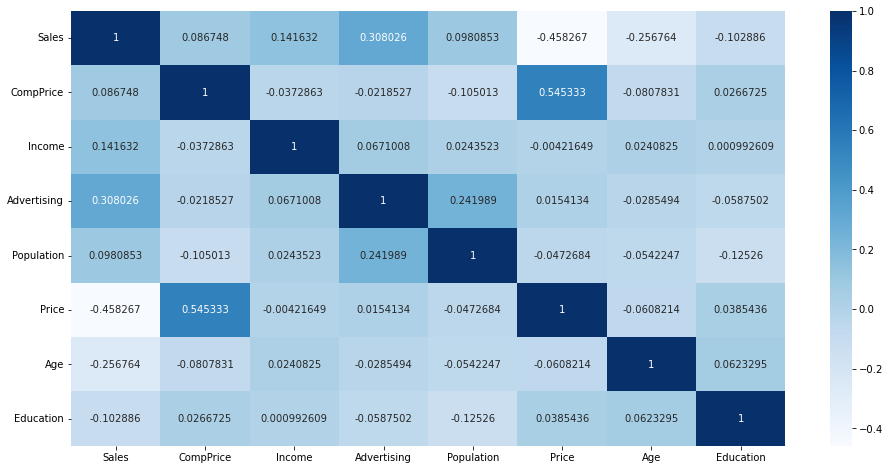

In [7]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(), cmap='Blues', fmt='g', annot=True)
plt.show()

# 상관관계를 통해 먼저 데이터간의 관계에서 price와 CompPrice간의 관계가 강한것이 확인됨.

## 2.데이터 전처리 

In [6]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [ ]:
# x = data.drop(target, axis = 1)
# y = data.loc[:, target]

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [7]:
data.isna().sum()

Sales           0
CompPrice      13
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

In [8]:
# 데이터 갯수가 많지 않아 결측치 삭제보단 평균값으로 채움
data['CompPrice'].fillna(data['CompPrice'].mean(), inplace=True)
data['Income'].fillna(data['Income'].mean(), inplace=True)

In [9]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

참고)KNN Imputer로 채우는 것도 가능(가변수화 된 상태에서 사용가능)

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.

In [10]:
cols = ['ShelveLoc','Education','Urban','US']
data = pd.get_dummies(data, columns=cols, drop_first=True)

- ShelveLoc', 'Urban', 'US', 'Education' 변수가 범주형으로써 0, 1로 구분이 안되어 있어 가변수화 실시

In [11]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,3.72,139.0,111.000000,5,310,132,62,0,0,0,0,1,0,0,0,0,0,1,1
1,2.93,143.0,21.000000,5,81,160,67,0,1,0,1,0,0,0,0,0,0,0,1
2,4.53,114.0,68.673611,0,97,125,29,0,1,0,1,0,0,0,0,0,0,1,0
3,8.47,119.0,88.000000,10,170,101,61,0,1,0,0,1,0,0,0,0,0,1,1
4,11.85,136.0,81.000000,15,425,120,67,1,0,0,0,0,0,0,0,0,0,1,1


### 2.4 추가변수 도출
* 데이터 탐색시 'CompPrice'와 'Price'가 서로 연관이 있었음
* 자사와 경쟁사 판매가격 차를 추가변수로 추가

In [12]:
data['diff'] = data['CompPrice'] - data['Price']

In [13]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes,diff
0,3.72,139.0,111.000000,5,310,132,62,0,0,0,0,1,0,0,0,0,0,1,1,7.0
1,2.93,143.0,21.000000,5,81,160,67,0,1,0,1,0,0,0,0,0,0,0,1,-17.0
2,4.53,114.0,68.673611,0,97,125,29,0,1,0,1,0,0,0,0,0,0,1,0,-11.0
3,8.47,119.0,88.000000,10,170,101,61,0,1,0,0,1,0,0,0,0,0,1,1,18.0
4,11.85,136.0,81.000000,15,425,120,67,1,0,0,0,0,0,0,0,0,0,1,1,16.0


### 2.5 데이터 분할

In [14]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2022)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있기에 스케일링을 해준다

In [ ]:
# x = (x-x.min()) / (x.max() - x.min())

In [34]:
max_x = x_train.max()
min_x = x_train.min()

In [37]:
x_train_sc = (x_train - min_x) / (max_x - min_x)
x_test_sc = (x_test - min_x) / (max_x - min_x)

In [38]:
x_train_sc.shape, x_test_sc.shape

((240, 19), (60, 19), (240,), (60,))

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_train_s = scaler.fit_transform(x_train)
# x_test_s = scaler.transform(x_test)

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

In [33]:
# 사용할 알고리즘
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


# 성능 검증용
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 성능 평가용
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import mean_absolute_error,r2_score

### 3.2 모델링

#### (1) Linear Regression 모델링

In [109]:
# 1. 모델 선언하기
model_lr = LinearRegression()

# 2. 모델 학습하기
model_lr.fit(x_train, y_train)

# 3. 모델 예측하기
y_pred = model_lr.predict(x_test)

# 4. 모델 평가하기
result = {}
result['Linear Regression'] = mean_absolute_error(y_test,y_pred)
print(mean_absolute_error(y_test,y_pred))

0.9792731621619262


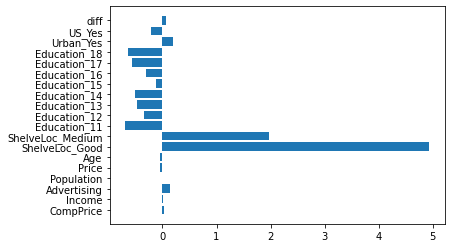

In [110]:
# 변수 가중치 시각화
plt.barh(y=list(x), width=model_lr.coef_.reshape(-1))
plt.show()

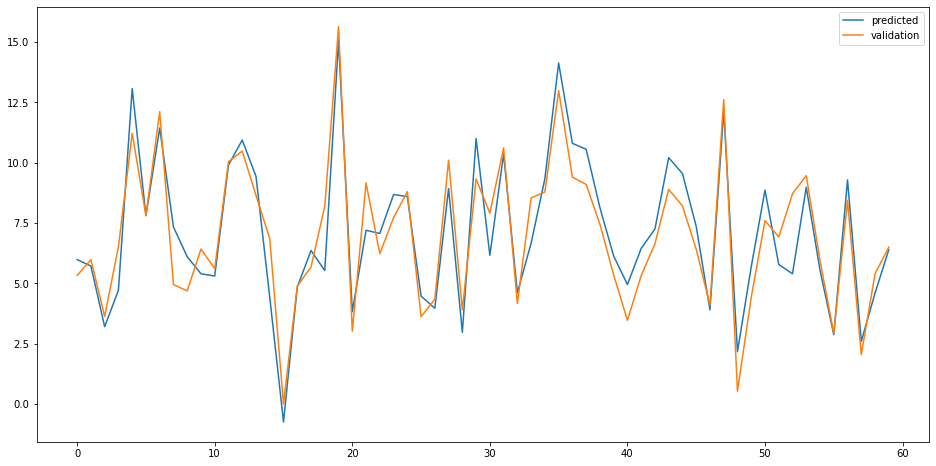

In [111]:
# 시각화
plt.figure(figsize=(16, 8))

plt.plot(y_pred, label='predicted')
plt.plot(y_test.values, label='validation')

plt.legend()
plt.show()

- Linear Regression은 따로 튜닝할 파라미터가 없기 때문에 단순 모델링을 진행함.
- 시각화를 통해 알 수 있듯이 실제 값을 잘 예측하고 있음.

#### (2) Decision Tree 모델링

In [115]:
model_dt = DecisionTreeRegressor(random_state=2022)
param = {'max_depth' : range(1,51) }

model = GridSearchCV(model_dt, param, cv=5, scoring='r2')

In [116]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2022),
             param_grid={'max_depth': range(1, 51)}, scoring='r2')

In [117]:
# 최적의 파라미터 확인
print(model.best_estimator_)
print('파라미터: ', model.best_params_)
print('성능: ', model.best_score_)

DecisionTreeRegressor(max_depth=5, random_state=2022)
파라미터:  {'max_depth': 5}
성능:  0.554739826285321


In [118]:
y_pred = model.predict(x_test)

In [119]:
result['Decision Tree'] = mean_absolute_error(y_test,y_pred)
print(mean_absolute_error(y_test,y_pred))

1.4714420420848993


파라미터 바꾸면서 MAE 작은 값 구함

In [91]:
model_dt = DecisionTreeRegressor(max_depth = 5)
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)
result['Decision Tree'] = mean_absolute_error(y_test,y_pred)
print(mean_absolute_error(y_test,y_pred))

1.413333333333333


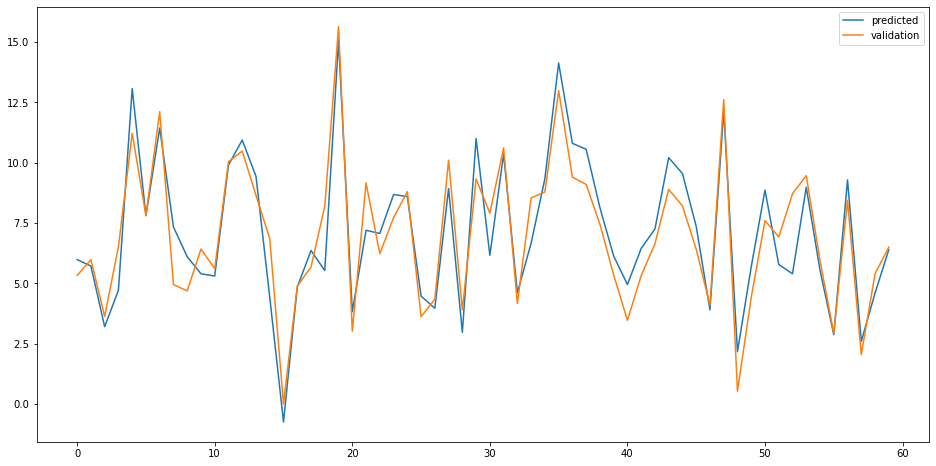

In [113]:
# 시각화
plt.figure(figsize=(16, 8))

plt.plot(y_pred, label='predicted')
plt.plot(y_test.values, label='validation')

plt.legend()
plt.show()

- Decision Tree의 경우 대표적인 파라미터인 max_depth를 튜닝함.
- 그리드서치를 통해 적합한 트리의 높이를 찾아보았지만 성능이 상당히 떨어짐을 알 수 있음.
- 튜닝 결과 최종 모델의 성능은 회귀 모델보다 떨어짐을 볼 수 있음.

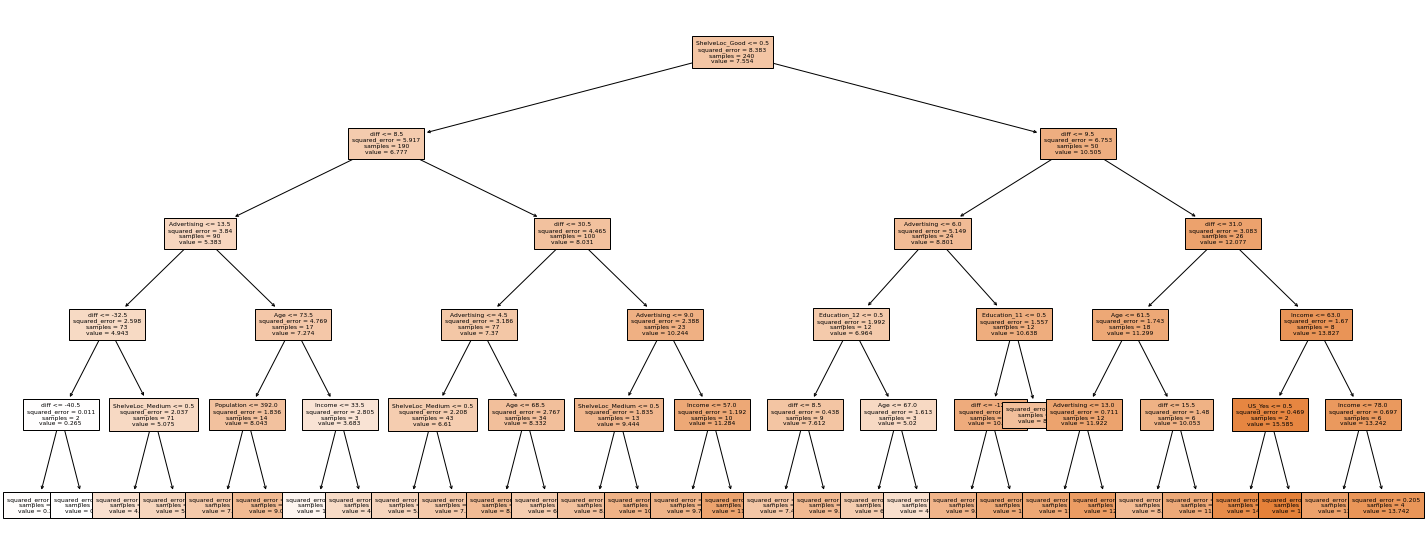

In [30]:
# 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(model.best_estimator_,
         filled=True,
         feature_names=list(x),
         fontsize=6)
plt.show()

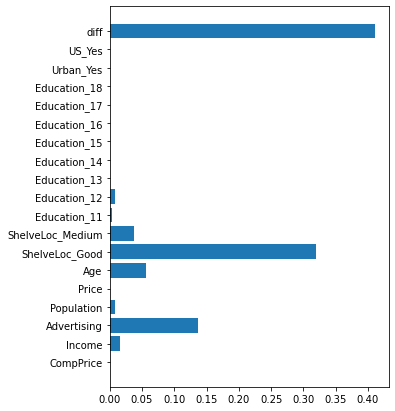

In [32]:
plt.figure(figsize=(5,7))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

- 급여차(diff)가 카시트 판매량에 가장 많은 영향을 끼치고, 그 다음 진열 상태가 좋은 것들이 영향을 끼침
- Education 이 중요하지 않은 변수 같아서 삭제 해도 될 것 같음.

#### (3) KNN 모델링
- 스케일링(정규화) 필요

In [203]:
model_knn = KNeighborsRegressor()
param = {'n_neighbors':range(1,51)}
model = GridSearchCV(model_knn,
                    param,
                    cv=5,
                    scoring='r2')

In [204]:
model.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 51)}, scoring='r2')

In [205]:
# 최적파라미터, 성능 확인
print('최적파라미터: ', model.best_params_)
print('성능: ', model.best_score_)

최적파라미터:  {'n_neighbors': 10}
성능:  0.36813750700789516


In [206]:
y_pred = model.predict(x_test_sc)

In [207]:
result['KNN'] = mean_absolute_error(y_test,y_pred)
print(mean_absolute_error(y_test,y_pred))

1.9907


#### (4) SVM 모델링
- 스케일링(정규화) 필요

In [125]:
model_svm = SVR()
param={
    'C':[1,10,100,1000,10000],
    'epsilon':[0.0001,0.001,0.01,1,10],
    'gamma':[0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
}

model = GridSearchCV(model_svm,
                    param,
                    cv=10,
                    scoring='r2')

In [126]:
model.fit(x_train_sc, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'epsilon': [0.0001, 0.001, 0.01, 1, 10],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100]},
             scoring='r2')

In [127]:
# 최적파라미터, 성능 확인
print('최적파라미터: ', model.best_params_)
print('성능: ', model.best_score_)

최적파라미터:  {'C': 10000, 'epsilon': 1, 'gamma': 0.001}
성능:  0.8198032721283972


In [128]:
y_pred = model.predict(x_test_sc)

In [129]:
result['SVM'] = mean_absolute_error(y_test,y_pred)
print(mean_absolute_error(y_test,y_pred))

1.0310712724384035


In [153]:
# 최종 모델

model = SVR(C=480, epsilon=0.1, gamma=0.001)
model.fit(x_train_sc, y_train)
y_pred = model.predict(x_test_sc)
result['SVM'] = mean_absolute_error(y_test,y_pred)
print(mean_absolute_error(y_test,y_pred))

0.8977557551785895


#### (5) Random Forest 모델링

In [164]:
model_rf = RandomForestRegressor(random_state=2022)
param = {'max_depth' : range(1, 5),
         'n_estimators' : range(1, 10)}
model= GridSearchCV(model_rf,
                    param,
                    cv=10,
                    scoring='r2',
                    verbose=1)

In [165]:
model.fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=2022),
             param_grid={'max_depth': range(1, 5),
                         'n_estimators': range(1, 10)},
             scoring='r2', verbose=1)

In [166]:
# 최적파라미터, 성능 확인
print('최적파라미터: ', model.best_params_)
print('성능: ', model.best_score_)

최적파라미터:  {'max_depth': 4, 'n_estimators': 7}
성능:  0.6149447763839644


In [167]:
y_pred = model.predict(x_test)

In [168]:
result['Random Forest'] = mean_absolute_error(y_test,y_pred)
print(mean_absolute_error(y_test, y_pred))

1.4902918804899223


In [186]:
model = RandomForestRegressor(random_state=2022, max_depth=12,n_estimators=20 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
result['Random Forest'] = mean_absolute_error(y_test,y_pred)
print(mean_absolute_error(y_test, y_pred))

1.263837539220039


#### (6) XGB 모델링

In [158]:
model_xgb = XGBRegressor(random_state=2022)

param = {
    'max_depth':range(1, 51),
    'learning_rate':[1, 0.1, 0.01],
}
model = GridSearchCV(model_xgb,
                    param,
                    cv=5,
                    scoring='r2')

In [159]:
model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False,
                                    eval_metric='mlogloss', gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=2022, reg_alpha=None,
                       

In [161]:
# 최적파라미터, 성능 확인
print('최적파라미터: ', model.best_params_)
print('성능: ', model.best_score_)

최적파라미터:  {'learning_rate': 0.1, 'max_depth': 2}
성능:  0.7917543653095533


In [162]:
y_pred = model.predict(x_test)

In [163]:
result['XGB'] = mean_absolute_error(y_test,y_pred)
print(mean_absolute_error(y_test, y_pred))

1.1665624388058982


In [201]:
model = XGBRegressor(random_state=2022,learning_rate=0.7, max_depth=1 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
result['XGB'] = mean_absolute_error(y_test,y_pred)
print(mean_absolute_error(y_test, y_pred))

1.093070149789254


## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [215]:
import tensorflow as tf
from tensorflow import keras

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계
- 스케일링(정규화) 필요

In [213]:
x_train_sc.shape, y_train_sc.shape

((240, 19), (240,))

* 모델1 

In [251]:
# Funtional API

keras.backend.clear_session()

il = keras.layers.Input(shape=(19,))
hl = keras.layers.Dense(128, activation='relu')(il)
hl = keras.layers.Dense(64, activation='relu')(hl)
hl = keras.layers.Dense(32, activation='relu')(hl)
ol = keras.layers.Dense(1)(hl)

DL_1 = keras.models.Model(il,ol)

DL_1.compile(loss='mae', optimizer='adam')
DL_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

* 모델2

In [231]:
# Sequential API

keras.backend.clear_session()

DL_2 = keras.models.Sequential()

DL_2.add(keras.layers.Input(shape=(19,)))
DL_2.add(keras.layers.Dense(256, activation = 'relu'))
DL_2.add(keras.layers.Dense(128, activation = 'relu'))
DL_2.add(keras.layers.Dense(64, activation = 'relu'))
DL_2.add(keras.layers.Dense(1))

DL_2.compile(loss='mae', optimizer = 'adam')

DL_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5120      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0
_________________________________________________________________


* 모델3

In [258]:
# Sequential API

keras.backend.clear_session()

DL_3 = keras.models.Sequential()

DL_3.add(keras.layers.Input(shape=(19,)))
DL_3.add(keras.layers.Dense(1))

DL_3.compile(loss='mae', optimizer = 'adam')

DL_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


In [217]:
from tensorflow.keras.callbacks import EarlyStopping

In [218]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1,restore_best_weights=True)

- 모델 1

In [252]:
hist1 = DL_1.fit(x_train_sc, y_train, epochs=1000, verbose=1, callbacks=[es],
        validation_split=0.2, batch_size=16)

Epoch 1/1000
12/12 [==============================] - 0s 16ms/step - loss: 6.9237 - val_loss: 6.0838
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 5.3834 - val_loss: 3.9568
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.8535 - val_loss: 2.1703
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.5038 - val_loss: 2.0078
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.1066 - val_loss: 1.9387
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 1.9596 - val_loss: 1.8367
Epoch 7/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.8082 - val_loss: 1.7764
Epoch 8/1000
12/12 [==============================] - 0s 3ms/step - loss: 1.7137 - val_loss: 1.7313
Epoch 9/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.6373 - val_loss: 1.6188
Epoch 10/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.5011 - val_loss: 1.544

In [254]:
y_pred= DL_1.predict(x_test_sc)
result['DL_1']=mean_absolute_error(y_test, y_pred)
print(mean_absolute_error(y_test, y_pred))

0.9981297098000845


- 모델 2

In [232]:
hist2 = DL_2.fit(x_train_sc, y_train, epochs=1000, verbose=1, callbacks=[es],
        validation_split=0.2, batch_size=16)

Epoch 1/1000
12/12 [==============================] - 0s 13ms/step - loss: 6.8930 - val_loss: 5.2226
Epoch 2/1000
12/12 [==============================] - 0s 4ms/step - loss: 3.5272 - val_loss: 2.3112
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 2.4327 - val_loss: 1.9085
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.9761 - val_loss: 1.7658
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.8131 - val_loss: 1.7259
Epoch 6/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.6595 - val_loss: 1.6343
Epoch 7/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.4186 - val_loss: 1.5502
Epoch 8/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.3391 - val_loss: 1.4935
Epoch 9/1000
12/12 [==============================] - 0s 4ms/step - loss: 1.1516 - val_loss: 1.3054
Epoch 10/1000
12/12 [==============================] - 0s 4ms/step - loss: 0.9992 - val_loss: 1.253

In [255]:
y_pred= DL_2.predict(x_test_sc)
result['DL_2']=mean_absolute_error(y_test, y_pred)
print(mean_absolute_error(y_test, y_pred))

1.0075419675509134


- 모델 3

In [259]:
hist3 = DL_3.fit(x_train_sc, y_train, epochs=1000, verbose=1, callbacks=[es],
        validation_split=0.2, batch_size=16)

Epoch 1/1000
12/12 [==============================] - 0s 11ms/step - loss: 7.6300 - val_loss: 7.3058
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.5469 - val_loss: 7.2292
Epoch 3/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.4648 - val_loss: 7.1520
Epoch 4/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.3813 - val_loss: 7.0756
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.2986 - val_loss: 6.9988
Epoch 6/1000
12/12 [==============================] - 0s 3ms/step - loss: 7.2160 - val_loss: 6.9216
Epoch 7/1000
12/12 [==============================] - 0s 4ms/step - loss: 7.1330 - val_loss: 6.8445
Epoch 8/1000
12/12 [==============================] - 0s 4ms/step - loss: 7.0495 - val_loss: 6.7679
Epoch 9/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.9666 - val_loss: 6.6910
Epoch 10/1000
12/12 [==============================] - 0s 4ms/step - loss: 6.8835 - val_loss: 6.614

In [260]:
y_pred= DL_3.predict(x_test_sc)
result['DL_3']=mean_absolute_error(y_test, y_pred)
print(mean_absolute_error(y_test, y_pred))

1.0021909371217093


- 딥러닝 모델은 히든레이어와 노드의 조절을 통해 모델의 성능을 높일 수 있음.
- 또한 딥러닝의 경우 정량적 데이터를 분석보다 이미지, 텍스트 데이터 학습에서 머신러닝보다 강한 모습을 보이기 때문에 현재 해당 회귀 문제에서는 적합해 보이지 않음.

## 5.성능 비교

* 알고리즘별 선정된 모델 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.

In [261]:
print("< 성능 >")
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

< 성능 >
Linear Regression 0.979
Decision Tree 1.471
SVM 0.898
Random Forest 1.264
XGB 1.093
KNN 1.991
DL_1 0.998
DL_2 1.008
DL_3 1.002


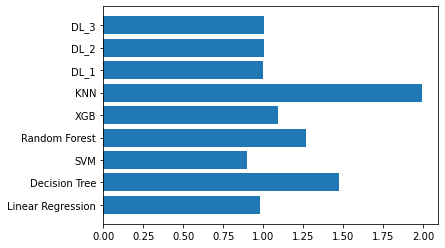

In [262]:
plt.barh(list(result), width=result.values())
plt.show()

- 주어진 문제가 회귀 문제이기 때문에 각각의 지표를 확인 했을 때, mae가 가장 낮은 모델은 바로 **SVM** 모델이었음.
- 따라서 현재 주어진 모델에 가장 적함한 모델은 'SVM'이라고 생각함.
- 튜닝할 파라미터를 조절 해 더 좋은 성능을 예측해야 할 겠음.

- 두번째로 좋은 모델은 선형회귀임.
- 그러나 선형회귀는 모델에 튜닝할 파라미터가 거의 없기 때문에 데이터 전처리가 더욱 중요해질 것으로 보임.

## 6.[팀과제]Test set으로 예측
* 전처리 코드 실행
* 예측
* 성능 튜닝 : Kaggle에서의 평가는 MAE로 하게 됩니다. 

#### 6.1 전처리 코드실행

* 주의!!! 
    * 전처리 코드는 2번에서의 순서를 반드시 지켜서 실행해야 합니다.
    * 중간에 오류가 나면, 순서가 맞지 않기때문에 발생될 수 있습니다. 


In [263]:
# 가변수화 코드 실행
cols = ['ShelveLoc','Education','Urban','US']
test = pd.get_dummies(test, columns=cols, drop_first=True)
test.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,131.0,111.0,13,33,80,68,0,0,0,0,0,0,0,0,0,1,1,1
1,123.0,57.0,0,66,105,39,0,1,1,0,0,0,0,0,0,0,1,0
2,136.0,60.0,7,303,147,41,0,1,0,0,0,0,0,0,0,0,1,1
3,143.0,77.0,25,448,156,43,0,1,0,0,0,0,0,0,1,0,1,1
4,111.0,75.0,1,377,108,25,1,0,0,1,0,0,0,0,0,0,1,0


In [264]:
# NAN 채우기
test['CompPrice'].fillna(test['CompPrice'].mean(), inplace=True)
test['Income'].fillna(test['Income'].mean(), inplace=True)

In [265]:
# 경쟁사와 가격 차 변수 만들기
test['diff'] = test['CompPrice']-test['Price']

In [276]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
col_x = list(test)
scaler = MinMaxScaler()
test_sc = scaler.fit_transform(test)

### **----------- Linear Regression -----------**

In [268]:
model_L = LinearRegression()

# 2. 모델 학습하기
model_L.fit(x_train, y_train)

# 3. 모델 예측하기
y_pred = model_L.predict(x_test)

# 4. 모델 평가하기

print(mean_absolute_error(y_test,y_pred))

0.9792731621619262


### **----------- SVM -----------**

In [267]:
model_svm = SVR(C=480, epsilon=0.1, gamma=0.001)
model_svm.fit(x_train_sc, y_train)
y_pred = model_svm.predict(x_test_sc)
print(mean_absolute_error(y_test,y_pred))

0.8977557551785895


#### 6.2 예측

* 5에서 가장 좋은 성능의 모델로 예측을 시도합니다.
* 결과를 csv 파일로 저장해서 업로드 합니다.

< Linear Regresstion >

In [269]:
y_pred_L = model_L.predict(test)

[ 9.78352113  7.80530674  6.16616528  7.85449201 10.82068535 10.54859642
  6.97477177 10.64501775  6.9711998   7.83704554  3.26848052  4.91113811
  9.5796037   4.12237323 10.35960878  8.12626456  8.9406988   8.54370567
  3.61781531 10.1418927  10.66210646  9.305631   11.20738392  4.54930843
  7.64650013 12.35444026  5.40695758 11.24161167 10.07193833  9.44830951
  6.72425968  5.02502358  9.59985833  7.11148284  7.72820688  7.89067486
  2.37195675  9.67363436  6.97718044  7.57686171 11.7906218   6.97278707
  4.10916443 10.80504933  6.05665077  6.84124478  7.81675837  8.72385105
  6.21763099  6.45808326  6.06286787  6.67778472 13.53310728  6.4894688
  7.14734495  7.15345733 10.49913896  4.40971972  6.36158152 10.23982177
  5.06696348  6.78563524  5.19090835  6.84311479  6.00112425  2.98429342
  4.18437064 10.19550493  9.79075566  5.11926405  6.36815612  1.82733402
  9.35597903  7.17128356  5.23496612  9.45772134 11.37170858  6.95681117
  7.91492848  7.21449246  4.38601523  7.12621749  4.

In [272]:
y_pred_L = pd.DataFrame(y_pred_L)
y_pred_L.head()

,0
0,9.783521
1,7.805307
2,6.166165
3,7.854492
4,10.820685


< svm >

In [277]:
y_pred_svm = model_svm.predict(test_sc)
y_pred_SVM = pd.DataFrame(y_pred_svm)
print(y_pred_svm)

[ 8.95932573  7.05664127  5.96728414  7.5980103  10.39989679  9.83313058
  6.59470587  9.88745399  6.55732007  7.38228083  3.45653514  4.59747926
  8.91599242  3.85682658  9.93325324  7.6135114   8.16656491  7.95294031
  3.13636445  9.66587713  9.73198434  8.42229696 10.52840121  4.48641054
  7.23714781 11.14863429  4.84470005 10.79697918  9.37092183  8.59819408
  6.44767269  4.97117579  9.5337291   6.79372292  7.04942877  7.69543086
  2.62913014  9.00461897  6.46997709  7.07331894 11.03059762  6.61991028
  3.96679453 10.53544839  6.01672313  6.59136999  7.41536743  8.2737776
  5.52895058  6.50555933  5.80803925  6.20303533 12.40737739  6.08384524
  7.13593621  6.91218288 10.07296435  4.48002939  5.88383319  9.42312845
  4.82687515  6.72391174  5.19193574  6.33286383  5.95337328  2.60052645
  4.25610709  9.79270357  9.25361783  4.94692551  5.83025718  1.92880654
  8.70860344  6.62108049  4.64826352  9.07928329 10.20458108  6.96044035
  7.62936324  6.77293047  3.90734415  6.64744245  4.

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [ ]:
# y_pred_L.to_csv("y_pred_L.csv")